In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from collections import Counter
from sklearn.cluster import KMeans  # Import KMeans from sklearn.cluster
import pandas as pd
from src.utils_clustering import *
import time

In [3]:
N_CLASSES = 15

In [4]:
DATASET_FILE_NAME = "s1"
file_path = rf'..\data\processed\{DATASET_FILE_NAME}.txt'
processed_data = pd.read_csv(file_path)

In [5]:
# Start measuring time
start_time = time.time()

kmeans_clustering = KMeans(n_clusters=N_CLASSES, random_state=42, n_init=10)
labels_pred = kmeans_clustering.fit_predict(processed_data)

# Measure elapsed time
end_time = time.time()
running_time = end_time - start_time

In [6]:
cluster_distribution = Counter(labels_pred)
print("Predicted Distribution: ",cluster_distribution)

Predicted Distribution:  Counter({7: 352, 10: 351, 8: 351, 5: 349, 13: 345, 9: 341, 3: 340, 14: 335, 6: 334, 1: 329, 11: 327, 12: 319, 2: 316, 4: 314, 0: 297})


In [7]:
LABELS_FILE_NAME = 's1-label'
labels_true = load_labels_from_file(rf'..\data\label\{LABELS_FILE_NAME}.pa', len(labels_pred))
cluster_distribution = Counter(labels_true)
print(cluster_distribution)

Counter({13: 350, 14: 350, 15: 350, 12: 349, 11: 347, 10: 342, 9: 341, 8: 338, 7: 334, 6: 326, 5: 325, 4: 318, 2: 316, 3: 314, 1: 300})


In [8]:
clustering_algorithm_name = 'KMeans_clustering'
dataset_name = DATASET_FILE_NAME
results_path = r'../results/metrics/results.csv'

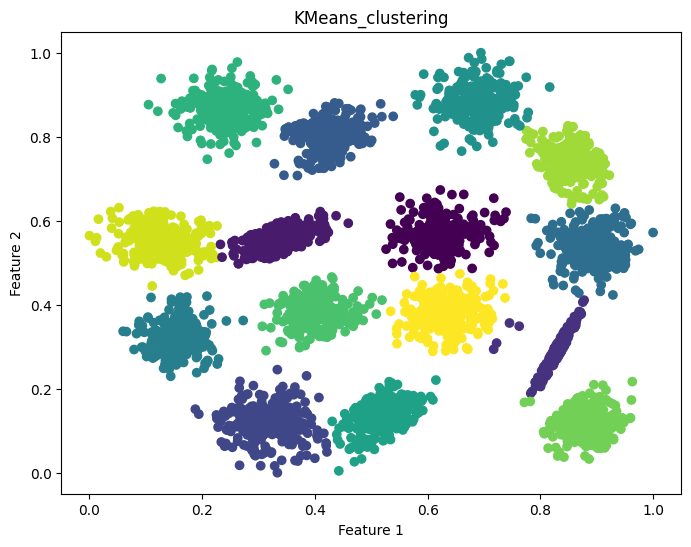

In [9]:
plot_clusters(processed_data, labels_pred, title=clustering_algorithm_name)

In [10]:
labels_pred = map_clusters_to_ground_truth(labels_true, labels_pred)

Confusion Matrix:


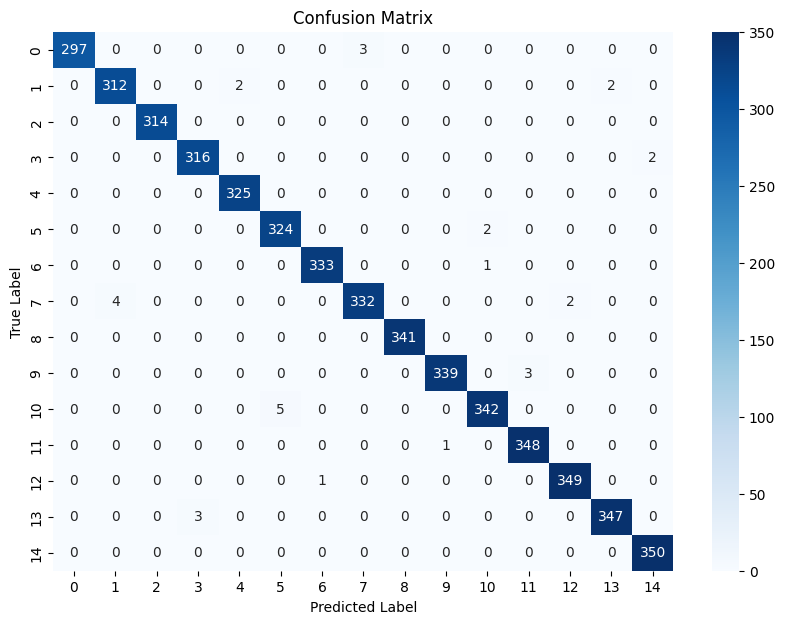

Each cluster's accuracy indicates how well the clustering algorithm has grouped the data points,
compared to the ground truth labels. Higher accuracy means a closer match to the expected grouping.

Cluster 1 Accuracy: 99.00%
Cluster 2 Accuracy: 98.73%
Cluster 3 Accuracy: 100.00%
Cluster 4 Accuracy: 99.37%
Cluster 5 Accuracy: 100.00%
Cluster 6 Accuracy: 99.39%
Cluster 7 Accuracy: 99.70%
Cluster 8 Accuracy: 98.22%
Cluster 9 Accuracy: 100.00%
Cluster 10 Accuracy: 99.12%
Cluster 11 Accuracy: 98.56%
Cluster 12 Accuracy: 99.71%
Cluster 13 Accuracy: 99.71%
Cluster 14 Accuracy: 99.14%
Cluster 15 Accuracy: 100.00%

Overall Accuracy: 99.38%
This represents the proportion of all data points that were correctly grouped by the clustering algorithm.


In [11]:
generate_confusion_matrix(labels_true, labels_pred, N_CLASSES)

In [12]:
algorithm_params = kmeans_clustering.get_params()
algorithm_details = str(algorithm_params)

In [13]:
# Evaluate and save results
evaluate_clustering(X=processed_data, labels_true=labels_true, labels_pred=labels_pred,
                    clus_algo_name=clustering_algorithm_name, dataset_name=dataset_name, 
                    results_path=results_path, algorithm_details=algorithm_details, 
                    running_time=running_time)

Timestamp: 2024-02-07 02:33:15.427582
Dataset: s1
Clustering Algorithm: KMeans_clustering
Algorithm Details: {'algorithm': 'lloyd', 'copy_x': True, 'init': 'k-means++', 'max_iter': 300, 'n_clusters': 15, 'n_init': 10, 'random_state': 42, 'tol': 0.0001, 'verbose': 0}
Running Time (seconds): 0.12375783920288086
Accuracy: 0.9938
